In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dfm = pd.read_csv('merged.csv')

# SVM

In [3]:
# SVM - Without GS 

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import SelectPercentile, chi2
from joblib import dump

In [5]:
mean_popularity = 50

In [6]:
y_prime = [1 if i >= mean_popularity else 0 for i in dfm["popularity"]]
y_popl = pd.concat([pd.Series(y_prime, name="popularity")], axis=1)
y = y_popl["popularity"]

In [7]:
drop_cols = ["id","popularity", "mode", "loudness", "loudness_ar", "loudness_yr"]
X = dfm.drop(drop_cols, axis=1)
len(X.columns), X.columns

(67,
 Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
        'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
        'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
        'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'minor', 'major',
        'acousticness_ar', 'danceability_ar', 'duration_ms_ar', 'energy_ar',
        'instrumentalness_ar', 'liveness_ar', 'speechiness_ar', 'tempo_ar',
        'valence_ar', 'popularity_ar', 'count', 'key_0_ar', 'key_1_ar',
        'key_2_ar', 'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar',
        'key_8_ar', 'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar',
        'major_ar', 'acousticness_yr', 'danceability_yr', 'duration_ms_yr',
        'energy_yr', 'instrumentalness_yr', 'liveness_yr', 'speechiness_yr',
        'tempo_yr', 'valence_yr', 'popularity_yr', 'key_0_yr', 'key_1_yr',
        'key_2_yr', 'key_3_yr', 'key_4_yr', 'key_5_yr', 'key_6_yr'],
       dtype='objec

In [8]:
X.shape, y.shape

((172230, 67), (172230,))

In [9]:
from sklearn.feature_selection import SelectPercentile, chi2

X = SelectPercentile(chi2, percentile=10).fit_transform(X, y)

input_scaler = StandardScaler()
X_normalized = input_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.20, random_state=42, stratify=y
)

In [10]:
svm = SVC(kernel='linear',
          C=1000,
          random_state=42)
svm.fit(X_train[:10000], y_train[:10000])
dump(svm, "mlspotify_SVM")

print("Train accuracy of svm algo:", svm.score(X_train[:10000], y_train[:10000]))
print("Test accuracy of svm algo:", svm.score(X_test, y_test))

Train accuracy of svm algo: 0.9129
Test accuracy of svm algo: 0.9143296754340127


In [11]:
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[28073   639]
 [ 2312  3422]]
Classification report

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     28712
           1       0.84      0.60      0.70      5734

    accuracy                           0.91     34446
   macro avg       0.88      0.79      0.82     34446
weighted avg       0.91      0.91      0.91     34446



In [12]:
# SVM - With GS 

In [13]:
# Grid param

param_grid = {
    'C': [1, 10],
    'kernel': ['linear'],
    'gamma': [ 'auto']
}

In [14]:
# Creating a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=1, gamma=auto, kernel=linear..............................
[CV 1/5; 1/2] END C=1, gamma=auto, kernel=linear;, score=0.913 total time= 1.3min
[CV 2/5; 1/2] START C=1, gamma=auto, kernel=linear..............................
[CV 2/5; 1/2] END C=1, gamma=auto, kernel=linear;, score=0.916 total time= 1.4min
[CV 3/5; 1/2] START C=1, gamma=auto, kernel=linear..............................
[CV 3/5; 1/2] END C=1, gamma=auto, kernel=linear;, score=0.914 total time= 1.6min
[CV 4/5; 1/2] START C=1, gamma=auto, kernel=linear..............................
[CV 4/5; 1/2] END C=1, gamma=auto, kernel=linear;, score=0.911 total time= 1.5min
[CV 5/5; 1/2] START C=1, gamma=auto, kernel=linear..............................
[CV 5/5; 1/2] END C=1, gamma=auto, kernel=linear;, score=0.912 total time= 1.4min
[CV 1/5; 2/2] START C=10, gamma=auto, kernel=linear.............................
[CV 1/5; 2/2] END C=10, gamma=auto, kernel=l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(random_state=42),
             param_grid={'C': [1, 10], 'gamma': ['auto'], 'kernel': ['linear']},
             scoring='accuracy', verbose=10)

In [15]:
# Saving the best model
dump(grid_search.best_estimator_, "mlspotify_SVM_gs")

['mlspotify_SVM_gs']

In [16]:
# Printing the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best cross-validation accuracy: 0.91


In [17]:
# Evaluating on the test set
y_pred = grid_search.predict(X_test)
print("Test accuracy: {:.2f}".format(grid_search.score(X_test, y_test)))

Test accuracy: 0.91


In [18]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[28170   542]
 [ 2434  3300]]
Classification report

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     28712
           1       0.86      0.58      0.69      5734

    accuracy                           0.91     34446
   macro avg       0.89      0.78      0.82     34446
weighted avg       0.91      0.91      0.91     34446



In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
# Calculating ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

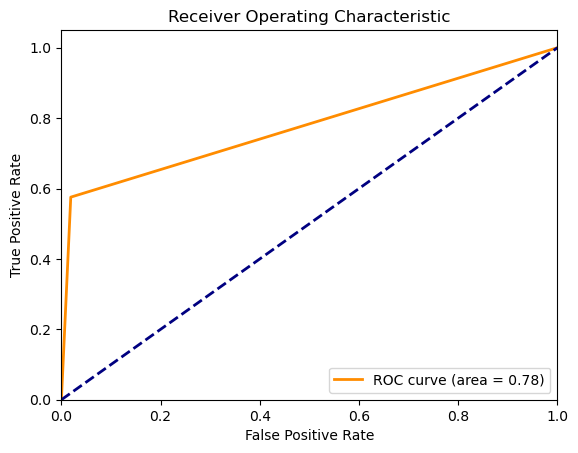

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()